# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
            * can range from mild symptoms to severe problems
            * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
            *Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [2]:
# Import all the needed tools

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models form Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

### Load Data

In [5]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

### Data Exploration (Exploratory Data Analysis)

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

It is balanced classification problem

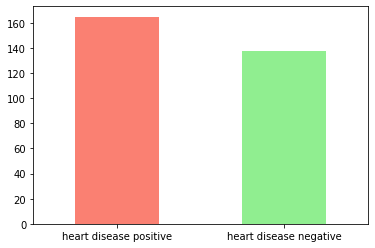

In [18]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightgreen"])
label = ("heart disease positive", "heart disease negative")
ticks = np.arange(len(label))

plt.xticks(ticks, label, rotation=0, fontsize='10', horizontalalignment='center');

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease frequency based on sex

In [21]:
# compare target with sex 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


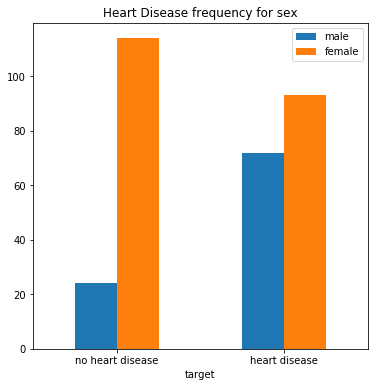

In [22]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (6,6))
plt.title("Heart Disease frequency for sex")
label = ["no heart disease", "heart disease"]
ticks = np.arange(len(label))
plt.xticks(ticks,label, rotation = 0, horizontalalignment= "center")
plt.legend(["male", "female"]);

### Age vs Max Heart Rate (thalach) for heart disease

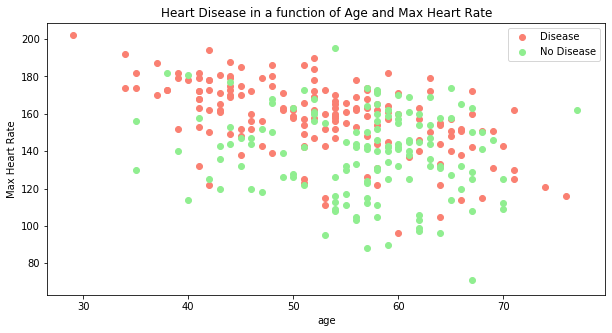

In [23]:
# create another figure
plt.figure(figsize = (10,5))

# scatter with positive example
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],
            c="salmon")

# scatter with negative example
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],
            c = "lightgreen");

# Add some helpful info
plt.title("Heart Disease in a function of Age and Max Heart Rate")
plt.xlabel("age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

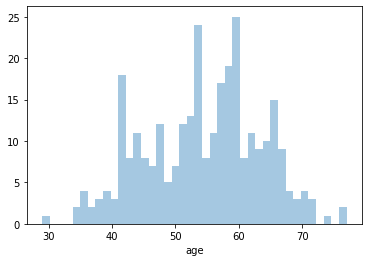

In [27]:
# check the age distribution
sns.distplot(df["age"], kde = False, bins =40);

In [28]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

### Heart Disease Frequency per Chest Pain type

cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [29]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


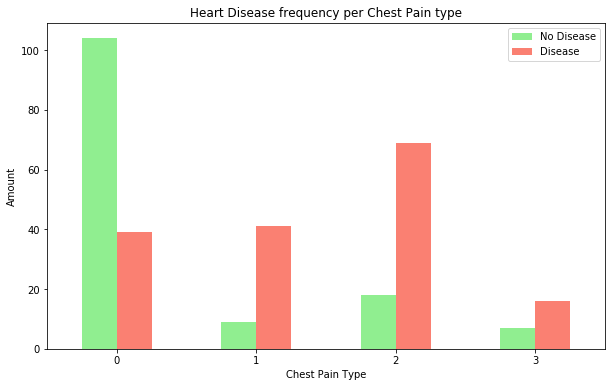

In [30]:
pd.crosstab(df.cp, df.target).plot(kind = "bar", figsize = (10,6) , color = ["lightgreen", "salmon"])
plt.title("Heart Disease frequency per Chest Pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

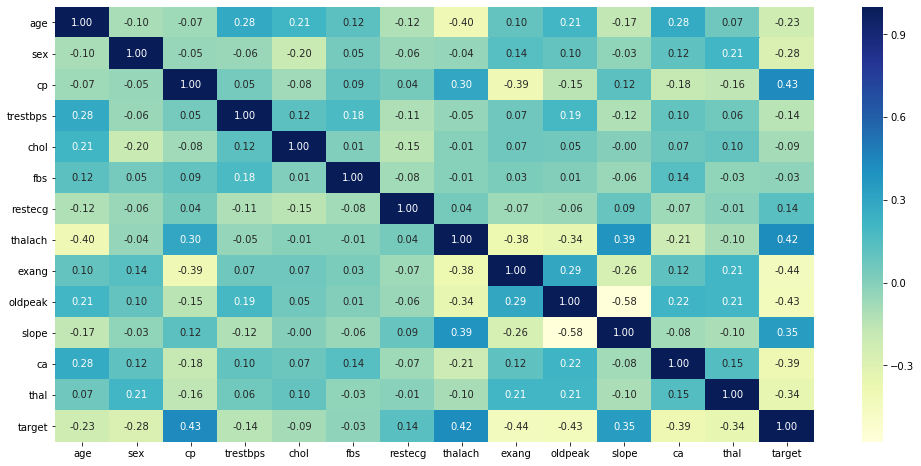

In [31]:
# Build and Visualise the correlation matrix using heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (17,8))

ax = sns.heatmap(corr_matrix,
                 annot = True,
                 fmt = ".2f",
                 cmap = "YlGnBu",
                 cbar = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom +0.5, top - 0.5);


Correlation matrix with higher positive value means a potential positive correlation and higher negative value means a potential negative correlation

## Modeling

In [34]:
np.random.seed(42)

# splitting data into X and y set
X = df.drop("target", axis = 1)
y = df.target

# make training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [60]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [61]:
%%time
# Baseline model :- prior any hyperparameters tuning
model_scores = fit_and_score(models,
                             X_train, 
                             X_test, 
                             y_train,
                             y_test)
model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Wall time: 240 ms


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparision

In [62]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])

model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


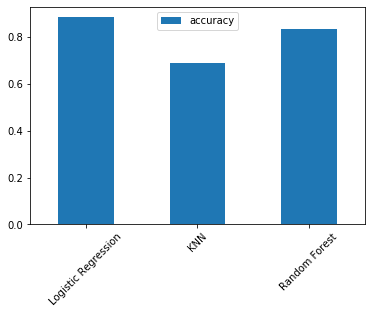

In [63]:
model_compare.T.plot(kind = "bar");
plt.xticks(rotation = 45, horizontalalignment = "center");

### Hyperparameter tuning (By Hand)

In [64]:
# Let's tune KNN model

train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors= i)
    
    # fit the algorithm
    knn.fit(X_train, y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # updare the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [65]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [66]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data : 75.41%


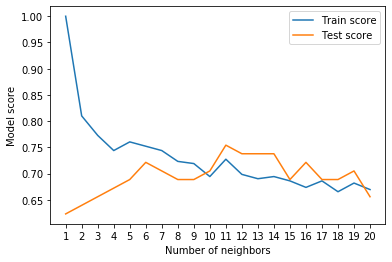

In [67]:
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f'Maximum KNN score on the test data : {max(test_scores)*100:.2f}%')

### Hyperparameter tuning with RandomizedSearchCV
We're going to tune:

* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [68]:
# create hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create hyperparameter grid for RandomForest
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}


Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [69]:
%%time
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for  LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 824 ms


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [70]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [71]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442


Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [72]:
%%time
# Tune RandomForestClassifer()
np.random.seed(42)

#setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter =20,
                           verbose = True)
# fit random hyperparameter search for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


Wall time: 1min 12s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [73]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [74]:
rs_rf.score(X_test, y_test)*100

86.88524590163934

In [75]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve it again using GridSearchCV...

In [77]:
%%time
# Tuning LogisiticRegression using GridSearchCV

# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,                             #No n_iter parameter is used here because GridSearchCV uses exhaustive search 
                          verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 925 ms


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [78]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [79]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible.

In [80]:
# Make predictions with tuned models
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
# 
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

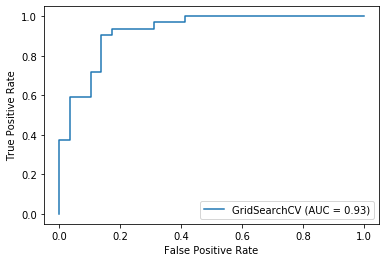

In [83]:
# Plot roc curve using sklearn function plot_roc_curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gs_log_reg, X_test, y_test);

In [84]:
# confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


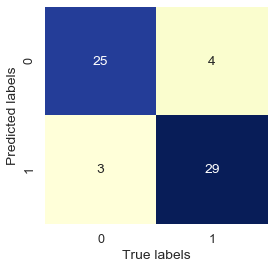

In [85]:
sns.set(font_scale=1.15)

def plot_conf_mat(y_test, y_preds):
    """
    plots a nice looking confusion matrix
    """
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False,
                     cmap = 'YlGnBu')
    plt.xlabel("True labels")
    plt.ylabel("Predicted labels")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom +0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)


Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.

In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [88]:
# check the best parameters of our model
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

#### create a new instance of model with best parameters and find some cross-validated metrics.

In [98]:
# create a new instance of model with best parameters
clf = LogisticRegression(C = 0.38566204211634725,
                         solver = "liblinear" )

 
# cross-validated accuracy
cv_acc = np.mean(cross_val_score(clf,
                 X,
                 y,
                 cv = 5,
                 scoring = "accuracy"))
# cross-validated precision
cv_precision = np.mean(cross_val_score(clf,
                       X,
                       y,
                       cv = 5,
                       scoring = "precision"))
# cross-validated recall
cv_recall = np.mean(cross_val_score(clf,
                       X,
                       y,
                       cv = 5,
                       scoring = "recall"))
# cross-validated f1-score
cv_f1 = np.mean(cross_val_score(clf,
                       X,
                       y,
                       cv = 5,
                       scoring = "f1"))


# Visualize cross validated-metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision" : cv_precision,
                           "Recall" : cv_recall,
                           "F1" : cv_f1},
                          index =["Model Score"])
cv_metrics


,Accuracy,Precision,Recall,F1
Model Score,0.838087,0.815467,0.915152,0.861485


#### Plot the cv_metrics

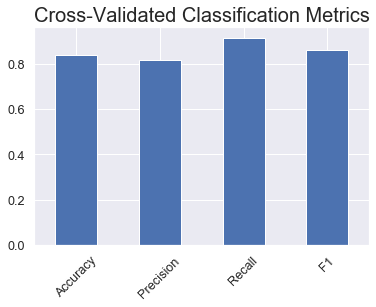

In [99]:
cv_metrics.T.plot(kind = "bar", legend = False )
plt.title("Cross-Validated Classification Metrics", fontsize=20)
plt.xticks(rotation = 45, horizontalalignment = "center");

## Feature Importance

In [100]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [101]:
clf = LogisticRegression(C = 0.38566204211634725,
                         solver = "liblinear")
clf.fit(X_train, y_train);

# check coef_
clf.coef_

array([[ 0.00529566, -1.07322391,  0.72277887, -0.01184884, -0.00190033,
         0.07236459,  0.40912626,  0.02528406, -0.73138903, -0.59561194,
         0.54564493, -0.70203145, -0.76994222]])

In [102]:
# Match coefs of features to columns
feature_dict = dict(zip(df.columns, clf.coef_[0]))
feature_dict

{'age': 0.005295661567947976,
 'sex': -1.073223905213913,
 'cp': 0.7227788729284297,
 'trestbps': -0.011848836810305621,
 'chol': -0.0019003283549230356,
 'fbs': 0.07236458533382914,
 'restecg': 0.40912625880243747,
 'thalach': 0.025284057557087472,
 'exang': -0.7313890307215234,
 'oldpeak': -0.5956119367023803,
 'slope': 0.5456449276366523,
 'ca': -0.7020314453158736,
 'thal': -0.7699422229017197}

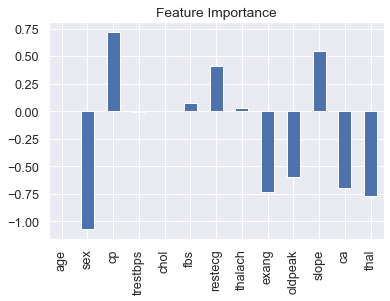

In [103]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index =[0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.9, which means as the value for sex increases, the target value decreases.

This can be seen by comparing the sex column to the target column.

In [105]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93



So when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

In [106]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope is the "slope of the peak exercise ST segment" where:

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

According to the model, there's a positive correlation of 0.15, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.